<a href="https://colab.research.google.com/github/hossein2024-hub/deep_learning/blob/assignment-1/02_activities/assignments/assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Advanced Image Classification with ImageNet

In this assignment, you will be asked to develop a convolutional neural network (CNN) to classify images from the CIFAR-100 dataset. At each step, you'll be guided through the process of developing a model architecture to solve a problem. Your goal is to create a CNN that attains at least 55% accuracy on the validation set.

### The CIFAR-100 Dataset

The [CIFAR-100 dataset](https://www.cs.toronto.edu/~kriz/cifar.html) consists of 60000 32x32 colour images in 100 classes, with 600 images per class. There are 50000 training images and 10000 test images. The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 500 images from each class.

### Tools

You will use Keras with TensorFlow to develop your CNN. For this assignment, it's strongly recommended that you use a GPU to accelerate your training, or else you might find it difficult to train your network in a reasonable amount of time. If you have a computer with a GPU that you wish to use, you can follow the [TensorFlow instructions](https://www.tensorflow.org/install/) for installing TensorFlow with GPU support. Otherwise, you can use [Google Colab](https://colab.research.google.com/) to complete this assignment. Colab provides free access to GPU-enabled machines. If you run into any issues, please contact us as soon as possible so that we can help you resolve them.

## Task 1: Data Exploration and Preprocessing (Complete or Incomplete)
### 1a: Load and Explore the Dataset
- Use the code below to download the dataset.
- Explore the dataset: examine the shape of the training and test sets, the dimensions of the images, and the number of classes. Show a few examples from the training set.

In [1]:
from keras.datasets import cifar100

# Load the CIFAR-100 dataset
(x_train, y_train), (x_test, y_test) = cifar100.load_data(label_mode='fine')

169001437/169001437 ━━━━━━━━━━━━━━━━━━━━ 13s 0us/step


In [2]:
class_names = [
    "apple", "aquarium_fish", "baby", "bear", "beaver", "bed", "bee", "beetle", "bicycle", "bottle",
    "bowl", "boy", "bridge", "bus", "butterfly", "camel", "can", "castle", "caterpillar", "cattle",
    "chair", "chimpanzee", "clock", "cloud", "cockroach", "couch", "crab", "crocodile", "cup", "dinosaur",
    "dolphin", "elephant", "flatfish", "forest", "fox", "girl", "hamster", "house", "kangaroo", "keyboard",
    "lamp", "lawn_mower", "leopard", "lion", "lizard", "lobster", "man", "maple_tree", "motorcycle", "mountain",
    "mouse", "mushroom", "oak_tree", "orange", "orchid", "otter", "palm_tree", "pear", "pickup_truck", "pine_tree",
    "plain", "plate", "poppy", "porcupine", "possum", "rabbit", "raccoon", "ray", "road", "rocket",
    "rose", "sea", "seal", "shark", "shrew", "skunk", "skyscraper", "snail", "snake", "spider",
    "squirrel", "streetcar", "sunflower", "sweet_pepper", "table", "tank", "telephone", "television", "tiger", "tractor",
    "train", "trout", "tulip", "turtle", "wardrobe", "whale", "willow_tree", "wolf", "woman", "worm"
]

- **Report the shape of the training and test sets, the dimension of the images, and the number of classes**

In [3]:
print( f"The shape of any data point in the training dataset is: {x_train.shape}")
print( f"The shape of any data point in the test dataset is: {x_test.shape}")
print( f"The shape of any image in the training dataset is: {x_train[0].shape}")
print( f"The number of classes in the dataset is: {len(class_names)}")
print(f"The minimum value of the training data set to be used for the normalization: {x_train[:].min().astype('float32')}")
print(f"The maximum value of the training data set to be used for the normalization: {x_train[:].max().astype('float32')}")
print(f"The minimum value of the test data set to be used for the normalization: {x_test[:].min().astype('float32')}")
print(f"The maximum value of the test data set to be used for the normalization: {x_test[:].max().astype('float32')}")

The shape of any data point in the training dataset is: (50000, 32, 32, 3)
The shape of any data point in the test dataset is: (10000, 32, 32, 3)
The shape of any image in the training dataset is: (32, 32, 3)
The number of classes in the dataset is: 100
The minimum value of the training data set to be used for the normalization: 0.0
The maximum value of the training data set to be used for the normalization: 255.0
The minimum value of the test data set to be used for the normalization: 0.0
The maximum value of the test data set to be used for the normalization: 255.0


- **Demonstrating a few examples from the training set**

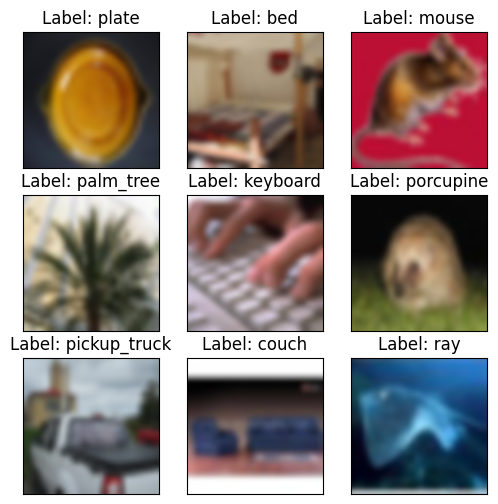

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Selecting 9 random indices
random_indices = np.random.choice(len(x_train), 9, replace=False)

# Creating a 3x3 grid plot
fig, axes = plt.subplots(3, 3, figsize=(6, 6))

for i, ax in enumerate(axes.flat):
    ax.imshow(x_train[random_indices[i]], interpolation='bicubic')
    ax.set_title(f"Label: {class_names[y_train[random_indices[i]][0]]}")

    # Removing axis labels
    ax.set_xticks([])
    ax.set_yticks([])

plt.show()

### 1b: Data Preprocessing
- With the data downloaded, it's time to preprocess it. Start by normalizing the images so that they all have pixel values in the range [0, 1].
- Next, convert the labels to one-hot encoded vectors.
- Finally, split the training set into training and validation sets. Use 80% of the training set for training and the remaining 20% for validation.

In [5]:
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

# Normalize the images

x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

# Convert the labels to one-hot encoded vectors

y_train = to_categorical(y_train, num_classes=100)
y_test = to_categorical(y_test, num_classes=100)

# split training data imnto training and validation datasets


x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)



## Task 2: Model Development (Complete or Incomplete)
### Task 2a: Create a Baseline CNN Model
- Design a CNN architecture. Your architecture should use convolutional layers, max pooling layers, and dense layers. You can use any number of layers, and you can experiment with different numbers of filters, filter sizes, strides, padding, etc. The design doesn't need to be perfect, but it should be unique to you.
- Print out the model summary.

In [6]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import BatchNormalization

# Initialize the model
model = keras.Sequential()

# First Convolutional Block
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))

# Second Convolutional Block
model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))

# Third Convolutional Block
model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))

# fOURTH Convolutional Block
model.add(layers.Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(layers.Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))

# Flattening and Fully Connected Layers
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(layers.Dropout(0.5))  # Dropout layer to reduce overfitting
model.add(layers.Dense(100, activation='softmax'))  # 100 classes

# Print model summary
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 32, 32, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 32, 32, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 16, 16, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 16, 16, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 16, 16, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 8, 8, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 8, 8, 256)           │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 8, 8, 256)           │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 4, 4, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 4, 4, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 4, 4, 512)           │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       1,049,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │              

 Total params: 5,791,652 (22.09 MB)

 Trainable params: 5,788,708 (22.08 MB)

 Non-trainable params: 2,944 (11.50 KB)

### Task 2b: Compile the model

- Select an appropriate loss function and optimizer for your model. These can be ones we have looked at already, or they can be different.
- Briefly explain your choices (one or two sentences each).
- <b>Loss function:</b> We use **categorical cross-entropy** since it is suitable for multi-class classification (100 classes), and it measures how well the predicted probability distribution matches the true distribution.

- <b>Optimizer:</b> We use **Adam optimizer** since it combines momentum and adaptive learning rates.

In [7]:
# Compile the model with Adam optimizer and categorical cross-entropy loss
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.0005),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)


## Task 3: Model Training and Evaluation (Complete or Incomplete)
### Task 3a: Train the Model

- Train your model for an appropriate number of epochs. Explain your choice of the number of epochs used - you can change this number before submitting your assignment.
- Use a batch size of 32.
- Use the validation set for validation.

In [8]:
history = model.fit(
    x_train, y_train,
    validation_data=(x_val, y_val),
    epochs=20,
    batch_size=32
)


Epoch 1/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 40s 23ms/step - accuracy: 0.0584 - loss: 4.7038 - val_accuracy: 0.1707 - val_loss: 3.5587
Epoch 2/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 26s 21ms/step - accuracy: 0.1837 - loss: 3.4446 - val_accuracy: 0.2497 - val_loss: 3.0312
Epoch 3/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 40s 20ms/step - accuracy: 0.3138 - loss: 2.7078 - val_accuracy: 0.2799 - val_loss: 3.0795
Epoch 4/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 42s 21ms/step - accuracy: 0.4208 - loss: 2.1799 - val_accuracy: 0.4154 - val_loss: 2.2366
Epoch 5/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 40s 21ms/step - accuracy: 0.5083 - loss: 1.7959 - val_accuracy: 0.4402 - val_loss: 2.1445
Epoch 6/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 27s 22ms/step - accuracy: 0.5946 - loss: 1.4340 - val_accuracy: 0.4794 - val_loss: 1.9918
Epoch 7/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 27s 21ms/step - accuracy: 0.6976 - loss: 1.0354 - val_accuracy: 0.4568 - val_loss: 2.2663
Epoch 8/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 40s 20ms/step - accuracy: 0.7781 -

### Task 3b: Accuracy and other relevant metrics on the test set

- Report the accuracy of your model on the test set.
- While accuracy is a good metric, there are many other ways to numerically evaluate a model. Report at least one other metric, and explain what it measures and how it is calculated.

- <b>Accuracy:</b> **50%** on the validation set
- <b>Other metric:</b> **Top-5** Accuracy
- <b>Reason for selection:</b> As we are training our model on image dataset, the model might misclassify within similar categories of avaiable images (e.g., diffeent dog breeds)
- <b>Value of metric:</b> **77%** on the test set
- <b>Interpretation of metric value:</b> It means that in **77% of cases** the correct class is within the top 5 predictions.  

In [9]:
#Evaluate the model on the test set

test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_acc * 100:.2f}%")

# Report top-5 accuracy metric
top5_acc = keras.metrics.TopKCategoricalAccuracy(k=5)
top5_acc.update_state(y_test, model.predict(x_test))
print(f"Top-5 Accuracy: {top5_acc.result().numpy() * 100:.2f}%")



313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.5152 - loss: 3.0357
Test Accuracy: 50.87%
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step
Top-5 Accuracy: 77.07%


### Task 3c: Visualize the model's learning

- Plot the training accuracy and validation accuracy with respect to epochs.
- Select an image that the model correctly classified in the test set, and an image that the model incorrectly classified in the test set. Plot the images and report the model's classification probabilities for each.
- Briefly discuss the results. What do the plots show? Do the results make sense? What do the classification probabilities indicate?

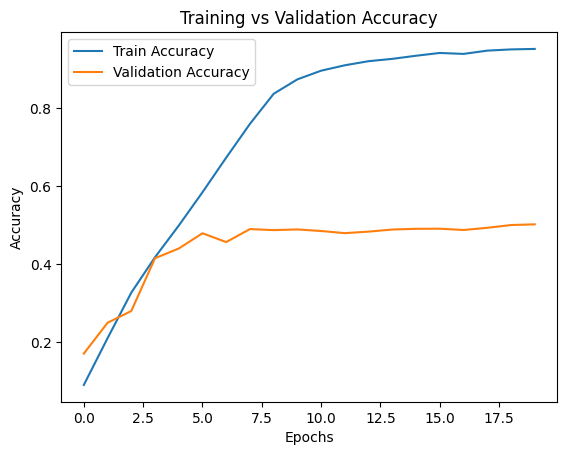

In [10]:
plt.plot(history.history["accuracy"], label="Train Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(loc = 'best')
plt.title("Training vs Validation Accuracy")
plt.show()


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


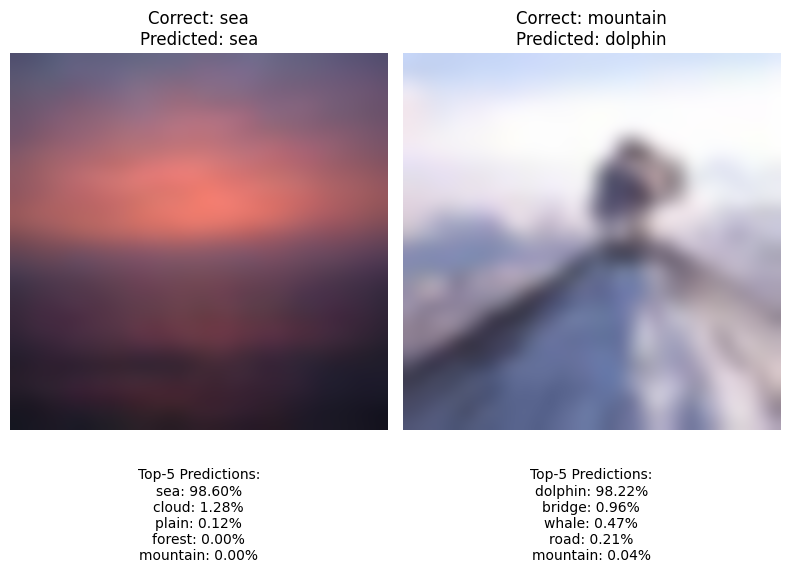

In [16]:
import numpy as np


# Get model predictions
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Select correct and incorrect predictions
correct_idx = np.where(y_pred_classes == y_true_classes)[0][0]
incorrect_idx = np.where(y_pred_classes != y_true_classes)[0][0]

# Plot images
fig, axes = plt.subplots(1, 2, figsize=(8, 6))

# Correctly classified image
axes[0].imshow(x_test[correct_idx], interpolation = 'bicubic')
axes[0].set_title(f"Correct: {class_names[y_true_classes[correct_idx]]}\nPredicted: {class_names[y_pred_classes[correct_idx]]}")
axes[0].axis("off")

# Display top 5 predictions for the correct image
top_5_indices_correct = np.argsort(y_pred[correct_idx])[-5:][::-1]
top_5_text_correct = "\n".join([f"{class_names[i]}: {y_pred[correct_idx][i]*100:.2f}%" for i in top_5_indices_correct])
axes[0].text(0.5, -0.1, f"Top-5 Predictions:\n{top_5_text_correct}",
             transform=axes[0].transAxes, fontsize=10, ha="center", va="top")

# Incorrectly classified image
axes[1].imshow(x_test[incorrect_idx], interpolation='bicubic')
axes[1].set_title(f"Correct: {class_names[y_true_classes[incorrect_idx]]}\nPredicted: {class_names[y_pred_classes[incorrect_idx]]}")
axes[1].axis("off")

# Display top 5 predictions for the incorrect image
top_5_indices_incorrect = np.argsort(y_pred[incorrect_idx])[-5:][::-1]
top_5_text_incorrect = "\n".join([f"{class_names[i]}: {y_pred[incorrect_idx][i]*100:.2f}%" for i in top_5_indices_incorrect])
axes[1].text(0.5, -0.1, f"Top-5 Predictions:\n{top_5_text_incorrect}",
             transform=axes[1].transAxes, fontsize=10, ha="center", va="top")

plt.tight_layout()
plt.show()


- ## Analysis of results


1.  **Overfitting**: The training accuracy is significantly higher than the validation accuracy, indicating that the model is overfitting. This is expected because the number of parameters in our model is much larger than the number of samples in the training dataset.
2.   **Classification probabilities**: The classification probabilities tells us how confident the model is in its predictions. For instance, the incorrect example eveidently shows a high-confidence incorrect prediction which is reasonable to be in most incorrect samples!



## Task 4: Model Enhancement (Complete or Incomplete)
### Task 4a: Implementation of at least one advanced technique

- Now it's time to improve your model. Implement at least one technique to improve your model's performance. You can use any of the techniques we have covered in class, or you can use a technique that we haven't covered. If you need inspiration, you can refer to the [Keras documentation](https://keras.io/).
- Explain the technique you used and why you chose it.
- If you used a technique that requires tuning, explain how you selected the values for the hyperparameters.

In [17]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=15,   # Randomly rotate images by 15 degrees
    width_shift_range=0.1,   # Random horizontal shift
    height_shift_range=0.1,  # Random vertical shift
    horizontal_flip=True  # Flip images horizontally
)
datagen.fit(x_train)






In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Improved CNN Model
model1 = Sequential()

# 1st Convolutional Block
model1.add(Conv2D(64, (3,3), activation='relu', padding='same', input_shape=(32,32,3)))
model1.add(BatchNormalization())
model1.add(Conv2D(64, (3,3), activation='relu', padding='same'))
model1.add(BatchNormalization())
model1.add(MaxPooling2D((2,2)))
model1.add(Dropout(0.3))


# 2nd Convolutional Block
model1.add(Conv2D(128, (3,3), activation='relu', padding='same'))
model1.add(BatchNormalization())
model1.add(Conv2D(128, (3,3), activation='relu', padding='same'))
model1.add(BatchNormalization())
model1.add(MaxPooling2D((2,2)))
model1.add(Dropout(0.4))

# 3rd Convolutional Block
model1.add(Conv2D(256, (3,3), activation='relu', padding='same'))
model1.add(BatchNormalization())
model1.add(Conv2D(256, (3,3), activation='relu', padding='same'))
model1.add(BatchNormalization())
model1.add(MaxPooling2D((2,2)))
model1.add(Dropout(0.5))

# 4th Convolutional Block
model1.add(Conv2D(512, (3,3), activation='relu', padding='same'))
model1.add(BatchNormalization())
model1.add(Conv2D(512, (3,3), activation='relu', padding='same'))
model1.add(BatchNormalization())
model1.add(MaxPooling2D((2,2)))
model1.add(Dropout(0.6))


# Fully Connected Layers
model1.add(Flatten())
model1.add(Dense(512, activation='relu'))
model1.add(BatchNormalization())
model1.add(Dropout(0.5))
model1.add(Dense(100, activation='softmax'))  # 100 classes

# Summary
model1.summary()




Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_16 (Conv2D)                   │ (None, 32, 32, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_14               │ (None, 32, 32, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 32, 32, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_15               │ (None, 32, 32, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_18 (Conv2D)                   │ (None, 16, 16, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_16               │ (None, 16, 16, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_19 (Conv2D)                   │ (None, 16, 16, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_17               │ (None, 16, 16, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_20 (Conv2D)                   │ (None, 8, 8, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_18               │ (None, 8, 8, 256)           │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_21 (Conv2D)                   │ (None, 8, 8, 256)           │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_19               │ (None, 8, 8, 256)           │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 4, 4, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 4, 4, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 5,795,492 (22.11 MB)

 Trainable params: 5,790,628 (22.09 MB)

 Non-trainable params: 4,864 (19.00 KB)

## Techniques to improve the performance of the model


*   **Data augmentation**: This can help to artificially increse the size of our dataset by creating modified versions of existing images. This helps the model learn better by making it more resistant to variations like rotation, flipping, or brightness changes. For example, if you have a picture of a cat, you can slightly rotate it, zoom in, or change its brightness—this helps the model recognize cats in different situations. It reduces overfitting and improves generalization to new images.
*   **Batch normalization**: Batch Normalization (BN) is a technique that normalizes the outputs of a layer so that they have a stable range of values. This helps the network learn faster and reduces sensitivity to weight initialization. It works by adjusting the activations using two trainable parameters (scale and shift), ensuring that values don’t become too big or too small. In simple terms, BN helps the model train faster and more reliably by keeping activations balanced.
* **Dropout**: Dropout is a regularization technique that randomly turns off a fraction of neurons in a layer during training. This forces the network to rely on different parts of the model rather than depending too much on a few strong neurons. For example, if a model learns to recognize a cat just by its whiskers, dropout ensures it also learns other features like ears or eyes. This makes the model more robust and less likely to overfit to the training data.





### Task 4b: Evaluation of the enhanced model

- Re-train your model using the same number of epochs as before.
- Compare the accuracy and other selected metric on the test set to the results you obtained before.
- As before, plot the training accuracy and validation accuracy with respect to epochs, and select an image that the model correctly classified in the test set, and an image that the model incorrectly classified in the test set. Plot the images and report the model's classification probabilities for each.

In [29]:
# Compile the model with Adam optimizer and categorical cross-entropy loss
model1.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.005),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

history_enhanced = model1.fit(
    datagen.flow(x_train, y_train, batch_size=64),
    validation_data=(x_val, y_val),
    epochs=40
)


Epoch 1/40
625/625 ━━━━━━━━━━━━━━━━━━━━ 43s 48ms/step - accuracy: 0.5839 - loss: 1.4930 - val_accuracy: 0.3977 - val_loss: 2.5892
Epoch 2/40
625/625 ━━━━━━━━━━━━━━━━━━━━ 30s 47ms/step - accuracy: 0.5544 - loss: 1.6038 - val_accuracy: 0.4576 - val_loss: 2.2227
Epoch 3/40
625/625 ━━━━━━━━━━━━━━━━━━━━ 29s 47ms/step - accuracy: 0.5580 - loss: 1.5964 - val_accuracy: 0.4860 - val_loss: 2.0825
Epoch 4/40
625/625 ━━━━━━━━━━━━━━━━━━━━ 41s 47ms/step - accuracy: 0.5650 - loss: 1.5559 - val_accuracy: 0.5032 - val_loss: 1.9817
Epoch 5/40
625/625 ━━━━━━━━━━━━━━━━━━━━ 41s 47ms/step - accuracy: 0.5710 - loss: 1.5346 - val_accuracy: 0.5421 - val_loss: 1.7996
Epoch 6/40
625/625 ━━━━━━━━━━━━━━━━━━━━ 30s 47ms/step - accuracy: 0.5740 - loss: 1.5332 - val_accuracy: 0.5350 - val_loss: 1.7924
Epoch 7/40
625/625 ━━━━━━━━━━━━━━━━━━━━ 30s 48ms/step - accuracy: 0.5784 - loss: 1.5032 - val_accuracy: 0.5354 - val_loss: 1.8050
Epoch 8/40
625/625 ━━━━━━━━━━━━━━━━━━━━ 29s 46ms/step - accuracy: 0.5887 - loss: 1.4723 - 

In [30]:
#Evaluate the model on the test set

test_loss, test_acc = model1.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_acc * 100:.2f}%")

# Report top-5 accuracy metric
top5_acc = keras.metrics.TopKCategoricalAccuracy(k=5)
top5_acc.update_state(y_test, model1.predict(x_test))
print(f"Top-5 Accuracy: {top5_acc.result().numpy() * 100:.2f}%")


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6189 - loss: 1.5725
Test Accuracy: 61.89%
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step
Top-5 Accuracy: 86.59%


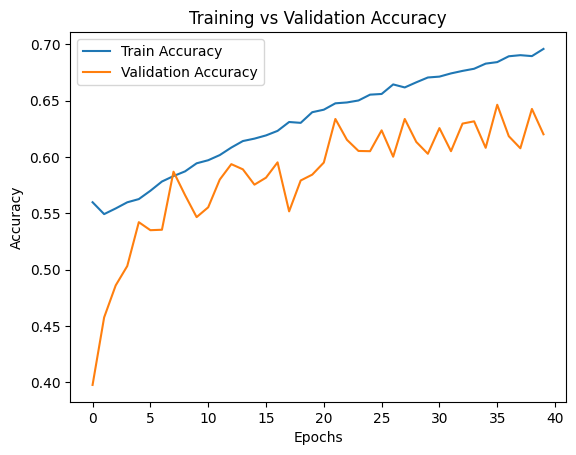

In [31]:
plt.plot(history_enhanced.history["accuracy"], label="Train Accuracy")
plt.plot(history_enhanced.history["val_accuracy"], label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(loc = 'best')
plt.title("Training vs Validation Accuracy")
plt.show()


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


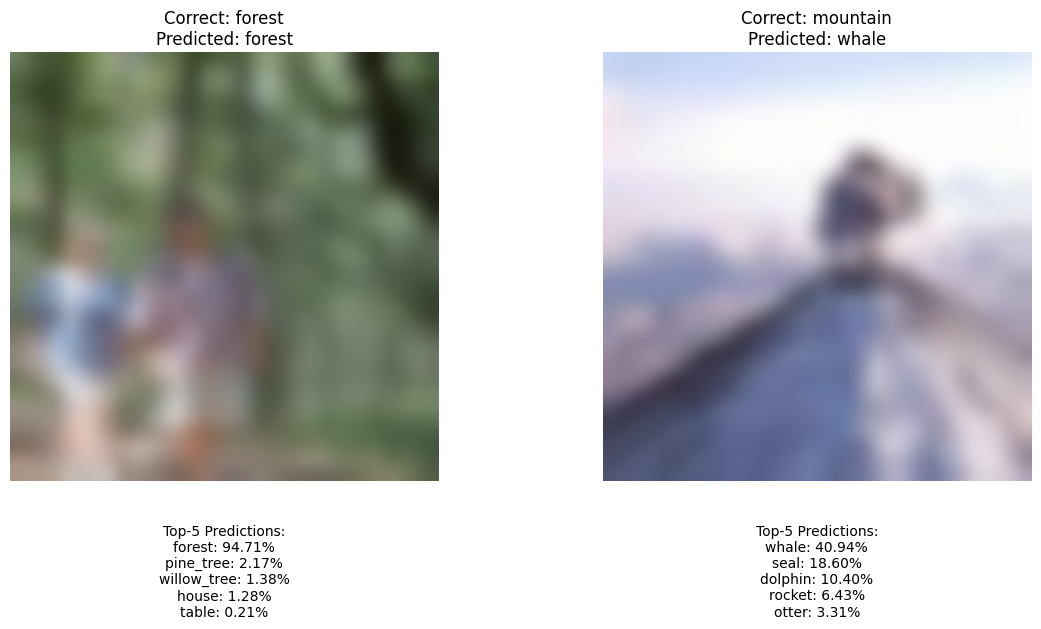

In [32]:
import numpy as np


# Get model predictions
y_pred = model1.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Select correct and incorrect predictions
correct_idx = np.where(y_pred_classes == y_true_classes)[0][0]
incorrect_idx = np.where(y_pred_classes != y_true_classes)[0][0]

# Plot images
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Correctly classified image
axes[0].imshow(x_test[correct_idx], interpolation = 'bicubic')
axes[0].set_title(f"Correct: {class_names[y_true_classes[correct_idx]]}\nPredicted: {class_names[y_pred_classes[correct_idx]]}")
axes[0].axis("off")

# Display top 5 predictions for the correct image
top_5_indices_correct = np.argsort(y_pred[correct_idx])[-5:][::-1]
top_5_text_correct = "\n".join([f"{class_names[i]}: {y_pred[correct_idx][i]*100:.2f}%" for i in top_5_indices_correct])
axes[0].text(0.5, -0.1, f"Top-5 Predictions:\n{top_5_text_correct}",
             transform=axes[0].transAxes, fontsize=10, ha="center", va="top")

# Incorrectly classified image
axes[1].imshow(x_test[incorrect_idx], interpolation='bicubic')
axes[1].set_title(f"Correct: {class_names[y_true_classes[incorrect_idx]]}\nPredicted: {class_names[y_pred_classes[incorrect_idx]]}")
axes[1].axis("off")

# Display top 5 predictions for the incorrect image
top_5_indices_incorrect = np.argsort(y_pred[incorrect_idx])[-5:][::-1]
top_5_text_incorrect = "\n".join([f"{class_names[i]}: {y_pred[incorrect_idx][i]*100:.2f}%" for i in top_5_indices_incorrect])
axes[1].text(0.5, -0.1, f"Top-5 Predictions:\n{top_5_text_incorrect}",
             transform=axes[1].transAxes, fontsize=10, ha="center", va="top")

plt.tight_layout()
plt.show()


### Task 4c: Discussion of the results

- Briefly discuss the results.
- Did the model's performance improve?
- Why do you think this is?
- Do you think there is room for further improvement? Why or why not?
- What other techniques might you try in the future?
- Your answer should be no more than 200 words.

# Your answer here

## Discussion of the result

### **Task 4c: Discussion of the Results**  

The enhanced model showed a **significant improvement** over the original model, increasing test accuracy from **50% to 62%** and top-5 accuracy from **77% to 86%**. This improvement suggests that the use of **data augmentation, additional batch normalization, and more frequent dropout** helped the model generalize better.  

The **sawtooth pattern** in the validation accuracy plot likely indicates some instability in training, possibly due to the increased dropout rates or learning rate fluctuations. However, the model still converged to a much higher accuracy, meaning these regularization techniques were beneficial overall.  

Additionally, the prediction probabilities changed in a meaningful way. In the enhanced model, the correct classification confidence remains very high of **95%**, while incorrect classification confidence dropped to **40.94%** (compared to 98% in the original model). This suggests that the enhanced model is **confident in correct predictions and less overconfident in incorrect ones**, which is a sign of improved calibration.  

Further improvements could be made by fine-tuning dropout rates, using learning rate scheduling, or experimenting with deeper architectures.

## Criteria

|Criteria|Complete|Incomplete|
|----|----|----|
|Task 1|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 2|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 3|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 4|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|

## Submission Information

🚨 **Please review our [Assignment Submission Guide](https://github.com/UofT-DSI/onboarding/blob/main/onboarding_documents/submissions.md)** 🚨 for detailed instructions on how to format, branch, and submit your work. Following these guidelines is crucial for your submissions to be evaluated correctly.

### Submission Parameters:
* Submission Due Date: `HH:MM AM/PM - DD/MM/YYYY`
* The branch name for your repo should be: `assignment-1`
* What to submit for this assignment:
    * This Jupyter Notebook (assignment_1.ipynb) should be populated and should be the only change in your pull request.
* What the pull request link should look like for this assignment: `https://github.com/<your_github_username>/deep_learning/pull/<pr_id>`
    * Open a private window in your browser. Copy and paste the link to your pull request into the address bar. Make sure you can see your pull request properly. This helps the technical facilitator and learning support staff review your submission easily.

Checklist:
- [ ] Created a branch with the correct naming convention.
- [ ] Ensured that the repository is public.
- [ ] Reviewed the PR description guidelines and adhered to them.
- [ ] Verify that the link is accessible in a private browser window.

If you encounter any difficulties or have questions, please don't hesitate to reach out to our team via our Slack at `#cohort-3-help`. Our Technical Facilitators and Learning Support staff are here to help you navigate any challenges.